<a href="https://colab.research.google.com/github/barrosm/BIMASTER_CODE_PUBLIC/blob/main/003_leitura_dados_diarios_cvm_20200906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leitura de dados diários de fundos de investimentos

### Data: 06/09/2020

## Alterei o código - farei apenas o download dos dados. Cálculos serão posteriormente feitos no BigQuery

### Mês início = 01/2018  Mês final = 08/2020  (antes inicio era 01/2020)

In [ ]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

import seaborn as sns; 
sns.set(rc={'figure.figsize':(17,6)})
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

import os
current_dir = os.getcwd()
current_dir

from time import perf_counter
import pickle

In [ ]:
os.chdir('..')  # vai um nível para cima
current_dir = os.getcwd()
current_dir

path = '/home/jovyan/work/@Fund_Eval/CVM/Diario/' #Linux
#path = current_dir + '\\CVM\\Diario\\'  #Windows

In [ ]:
# REMOTE PATH
remote_path = '/home/jupyter/Notebooks/monica/@Fund_Eval/CVM/Diario/'

In [ ]:
current_dir

'/home/jovyan/work'

In [ ]:
path = '/home/jovyan/work/@Fund_Eval/CVM/Diario/' 
path

'/home/jovyan/work/@Fund_Eval/CVM/Diario/'

In [ ]:
url_address = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_'

In [ ]:
## Ano 2018
ct = ['201801','201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812']

In [ ]:
# Ano 2020
#ct = ['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008']

In [ ]:
start_month = ct[0]
end_month = ct[-1]

In [ ]:
filename = 'df_diario_'+start_month+'_'+end_month+'.pkl'

In [ ]:
filename_csv = 'df_diario_'+start_month+'_'+end_month+'.csv'

In [ ]:
arq_names = [url_address + i + '.csv' for i in ct]

In [ ]:
arq_names[-5:]

['http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201808.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201809.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201810.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201811.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201812.csv']

In [ ]:
# Número de arquivos (meses) lidos 
len(arq_names)

12

In [ ]:
# Cria dataframe vazia
df = pd.DataFrame()

## Leitura dos arquivos de um ano e concatenação num único dataframe - o índice é o CNPJ

In [ ]:
%time
time_start = perf_counter()
df = pd.concat((pd.read_csv(f, sep = ';', index_col=0) for f in arq_names))
time_end = perf_counter()
elapsed_time = time_end - time_start

print(' **** a leitura dos dados demorou ', round(elapsed_time,2) , ' segundos *****')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
 **** a leitura dos dados demorou  23.67  segundos *****


In [ ]:
#df.head(3)
#df.tail(3)

In [ ]:
df = df.reset_index() # Do not do it until you want to group by cnpj
df.head(3)

,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,00.017.024/0001-53,2018-01-02,1130197.89,25.968274,1130221.60,0.0,0.0,1
1,00.017.024/0001-53,2018-01-03,1130497.24,25.972772,1130417.38,0.0,0.0,1
2,00.017.024/0001-53,2018-01-04,1130796.56,25.977238,1130611.74,0.0,0.0,1


## Salva dataframe com todos os dados diários em arquivo pkl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589065 entries, 0 to 3589064
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 219.1+ MB


In [ ]:
filename_csv

'df_diario_201801_201812.csv'

In [ ]:
path

'/home/jovyan/work/@Fund_Eval/CVM/Diario/'

In [ ]:
time_start = perf_counter()

#df.to_pickle(remote_path+filename) # changed to remote path
df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  4.08  segundos *****


## Salva como csv

In [ ]:
df.to_csv(path+filename_csv, sep = ',', index = False) 

# Refaz para os anos 2019 e 2020

In [ ]:
## Ano 2019
ct = ['201901','201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912']

start_month = ct[0]
end_month = ct[-1]
filename = 'df_diario_'+start_month+'_'+end_month+'.pkl'
filename_csv = 'df_diario_'+start_month+'_'+end_month+'.csv'

arq_names = [url_address + i + '.csv' for i in ct]

# Cria dataframe vazia
df = pd.DataFrame()

## Leitura dos arquivos e concatenação num único dataframe - o índice é o CNPJ
%time
time_start = perf_counter()
df = pd.concat((pd.read_csv(f, sep = ';', index_col=0) for f in arq_names))
time_end = perf_counter()
elapsed_time = time_end - time_start

print(' **** a leitura dos dados demorou ', round(elapsed_time,2) , ' segundos *****')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
 **** a leitura dos dados demorou  30.04  segundos *****


In [ ]:
df = df.reset_index() # Do not do it until you want to group by cnpj
df.head(3)

,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,00.017.024/0001-53,2019-01-02,1134502.30,26.653280,1130684.21,0.0,0.0,1
1,00.017.024/0001-53,2019-01-03,1134781.90,26.655665,1130785.41,0.0,0.0,1
2,00.017.024/0001-53,2019-01-04,1135061.25,26.658060,1130887.00,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936018 entries, 0 to 3936017
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 240.2+ MB


In [ ]:
filename_csv

'df_diario_201901_201912.csv'

In [ ]:
# Salva como pkl
time_start = perf_counter()

#df.to_pickle(remote_path+filename) # changed to remote path
df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  4.15  segundos *****


In [ ]:
# Salva como csv
time_start = perf_counter()

df.to_csv(path+filename_csv, sep = ',', index = False) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .csv demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .csv demorou  119.81  segundos *****


In [ ]:
## Ano 2017
ct = ['201701','201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712']

start_month = ct[0]
end_month = ct[-1]
filename = 'df_diario_'+start_month+'_'+end_month+'.pkl'
filename_csv = 'df_diario_'+start_month+'_'+end_month+'.csv'

arq_names = [url_address + i + '.csv' for i in ct]

# Cria dataframe vazia
df = pd.DataFrame()

## Leitura dos arquivos e concatenação num único dataframe - o índice é o CNPJ
%time
time_start = perf_counter()
df = pd.concat((pd.read_csv(f, sep = ';', index_col=0) for f in arq_names))
time_end = perf_counter()
elapsed_time = time_end - time_start

print(' **** a leitura dos dados demorou ', round(elapsed_time,2) , ' segundos *****')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
 **** a leitura dos dados demorou  22.81  segundos *****


In [ ]:
# Salva como pkl
time_start = perf_counter()

#df.to_pickle(remote_path+filename) # changed to remote path
df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  3.33  segundos *****


In [ ]:
# Salva como csv
time_start = perf_counter()

df.to_csv(path+filename_csv, sep = ',', index = False) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .csv demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .csv demorou  61.03  segundos *****


## se deu encrenca e o kernel morreu, reler df = pd.read_pickle(path+filename)

In [ ]:
time_start = perf_counter()

#df2.to_pickle(filename)
#df.to_pickle(remote_path+filename) # changed to remote path
df2.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  2.64  segundos *****


In [ ]:
#df[['DT_COMPTC', 'VL_QUOTA', 'Return']][df['CNPJ_FUNDO']=='97.929.213/0001-34']

In [ ]:
# Example - return of a randomly chosen fund

#numpy.random.randint(low, high=None, size=None, dtype='l')
random_row = np.random.randint(0,len(df2))
random_cnpj = df2['CNPJ_FUNDO'].iloc[random_row,]
random_cnpj

'26.374.820/0001-37'

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914525 entries, 0 to 2914524
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
 8   Return         float64
dtypes: float64(6), int64(1), object(2)
memory usage: 200.1+ MB


In [ ]:
df_to_plot = df2[['CNPJ_FUNDO','DT_COMPTC','Return']].copy()

In [ ]:
df_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914525 entries, 0 to 2914524
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CNPJ_FUNDO  object 
 1   DT_COMPTC   object 
 2   Return      float64
dtypes: float64(1), object(2)
memory usage: 66.7+ MB


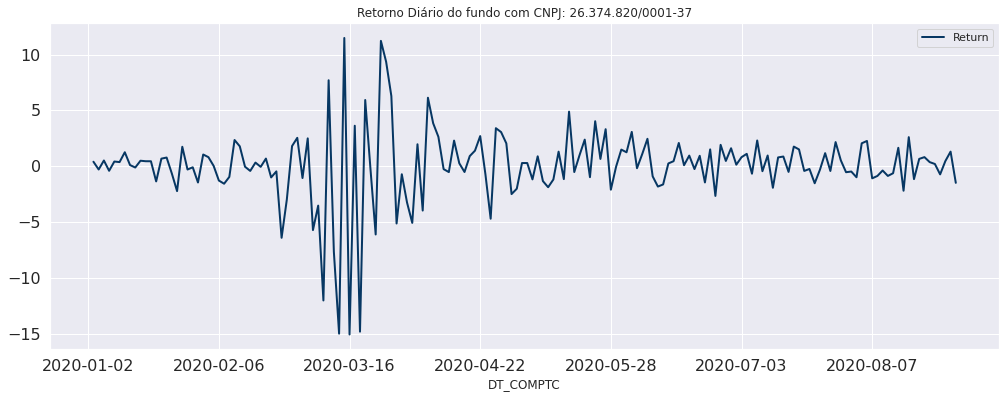

In [ ]:
sns.set(rc={'figure.figsize':(17,6)})
df_to_plot[['DT_COMPTC','Return']][df_to_plot['CNPJ_FUNDO']==random_cnpj].set_index('DT_COMPTC').plot(title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                                                                     fontsize = 16, linewidth = 2.0, color = '#073763');

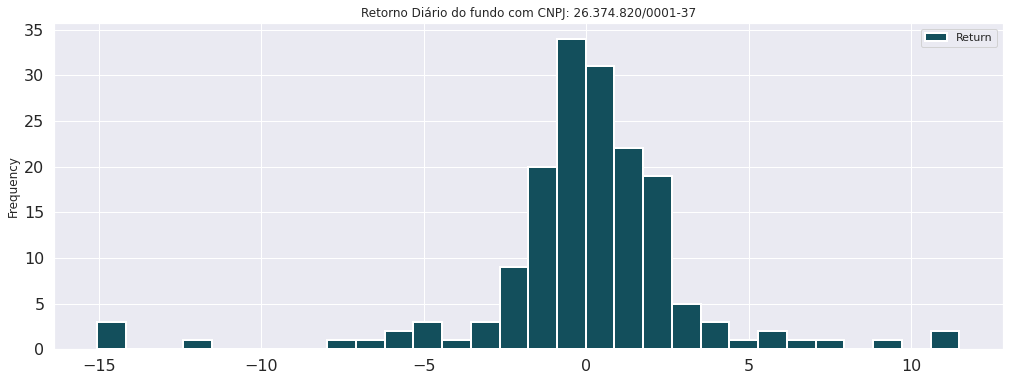

In [ ]:
sns.set(rc={'figure.figsize':(17,6)})
df2[['Return']][df2['CNPJ_FUNDO']==random_cnpj].plot.hist(bins = 30, title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                        fontsize = 16, linewidth = 2.0, color = '#134f5c')

In [ ]:
# Show days where return below 1% for randomly selected fund

df2[['DT_COMPTC','Return']][(df2['CNPJ_FUNDO']==random_cnpj )& (df2['Return'] < -1)].set_index('DT_COMPTC')

,Return
DT_COMPTC,
2020-01-21,-1.353030
2020-01-27,-2.223459
2020-01-31,-1.450969
2020-02-06,-1.276622
2020-02-07,-1.560422
2020-02-26,-6.401179
2020-02-27,-2.978926
2020-03-03,-1.050497
2020-03-05,-5.709245


In [ ]:
path

'/home/jovyan/work/@Fund_Eval/CVM/Diario/'

## Salva dataframe incluindo retornos diários em arquivo csv

In [ ]:
time_start = perf_counter()
df2.to_csv(path+'df_diario_'+str(ct[0])+'_'+str(ct[-1])+'.csv',sep = ';' ,encoding='utf-8')#, compression = 'zip')
#df2.to_csv('df_diario_'+str(ct[0])+'_'+str(ct[-1])+'.csv',sep = ';' ,encoding='utf-8')#, compression = 'zip')

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .csv demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .csv demorou  122.97  segundos *****
